In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [2]:
from helpers import load_data, preprocess_data

path_dataset = "movielens100k.csv"
ratings = load_data(path_dataset)

number of items: 1682, number of users: 943


### Plot the number of ratings per movie and user

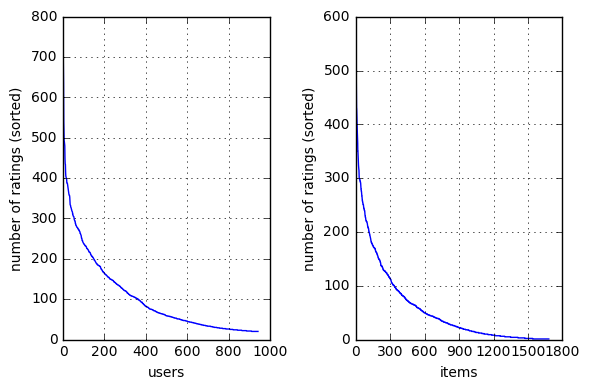

min # of items per user = 20, min # of users per item = 1.


In [3]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

### Split the data into a train and test set

In [26]:
def split_data(ratings, num_items_per_user, num_users_per_item,
               min_num_ratings, p_test=0.1):
    """split the ratings to training data and test data.
    Args:
        min_num_ratings: 
            all users and items we keep must have at least min_num_ratings per user and per item. 
    """
    # set seed
    np.random.seed(988)
    
    # select user and item based on the condition.
    valid_users = np.where(num_items_per_user >= min_num_ratings)[0]
    valid_items = np.where(num_users_per_item >= min_num_ratings)[0]
    valid_ratings = ratings[valid_items, :][: , valid_users]  
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data and return train and test data. TODO
    # NOTE: we only consider users and movies that have more
    # than 10 ratings
    # ***************************************************
        
    test = sp.lil_matrix((len(valid_items), len(valid_users)))
    train = sp.lil_matrix((len(valid_items), len(valid_users)))
    
    for idx_it, it in enumerate(valid_items):
        for idx_usr, usr in enumerate(valid_users):
            if np.random.random() < p_test:
                test[idx_it, idx_usr] = ratings[it, usr]
            else:
                train[idx_it, idx_usr] = ratings[it, usr]
    
    print("Total number of nonzero elements in origial data:{v}".format(v=ratings.nnz))
    print("Total number of nonzero elements in train data:{v}".format(v=train.nnz))
    print("Total number of nonzero elements in test data:{v}".format(v=test.nnz))
    return valid_ratings, train, test

Total number of nonzero elements in origial data:99999
Total number of nonzero elements in train data:88084
Total number of nonzero elements in test data:9868


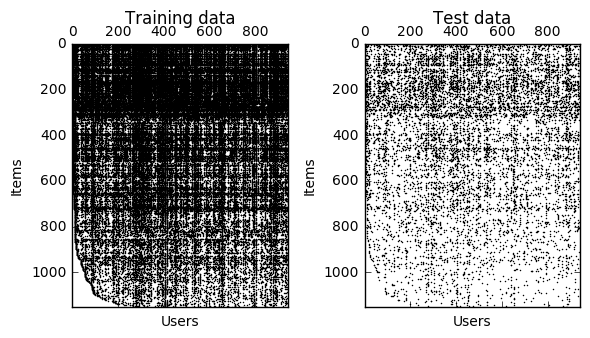

In [27]:
from plots import plot_train_test_data

valid_ratings, train, test = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)
plot_train_test_data(train, test)

## Implementing Baselines 

### Use the global mean to do the prediction

In [48]:
from helpers import calculate_mse

def baseline_global_mean(train, test):
    """baseline method: use the global mean."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************    
    #raise NotImplementedError
    
    num_items, num_users = train.shape
    
    mean = 0;
    nbr = 0;
    
    for i in range(num_items):
        for j in range(num_users):
            mean += train[i,j]
            if train[i,j] != 0:
                nbr += 1;
    pred = mean/nbr;
    
    mse = 0;
    nbr = 0;
    
    for i in range(num_items):
        for j in range(num_users):
            if test[i,j] != 0:
                mse += 0.5*(pred-test[i,j])**2
                nbr += 1
                
    print("MSE: ", mse/nbr)
            
baseline_global_mean(train, test)

MSE:  0.621318065347


### Use the user means as the prediction

In [49]:
def baseline_user_mean(train, test):
    """baseline method: use the user means as the prediction."""
    num_items, num_users = train.shape
    
    pred = [];
    
    for j in range(num_users):
        nbr = 0;
        mm = 0;
        for i in range(num_items):
            mm += train[i,j]
            if train[i,j] != 0:
                nbr += 1;
        pred.append(mm/nbr)
    
    mse = 0;
    nbr = 0;
    
    for j in range(num_users):
        for i in range(num_items):
            if test[i,j] != 0:
                mse += 0.5*(pred[j]-test[i,j])**2
                nbr += 1
                
    print("MSE: ", mse/nbr)

baseline_user_mean(train, test)

MSE:  0.540467764012


### Use the item means as the prediction

In [50]:
def baseline_item_mean(train, test):
    """baseline method: use item means as the prediction."""
    num_items, num_users = train.shape
    
    pred = [];
    
    for i in range(num_items):
        nbr = 0;
        mm = 0;
        for j in range(num_users):
            mm += train[i,j]
            if train[i,j] != 0:
                nbr += 1;
        pred.append(mm/nbr)
    
    mse = 0;
    nbr = 0;
    
    for i in range(num_items):
        for j in range(num_users):
            if test[i,j] != 0:
                mse += 0.5*(pred[i]-test[i,j])**2
                nbr += 1
                
    print("MSE: ", mse/nbr)
    
baseline_item_mean(train, test)

MSE:  0.515285492261


### Learn the Matrix Factorization using SGD

#### Initialize matrix factorization

In [ ]:
def init_MF(train, num_features):
    """init the parameter for matrix factorization."""
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # you should return:
    #     user_features: shape = num_features, num_user
    #     item_features: shape = num_features, num_item
    # ***************************************************
    
    

Compute the cost by the method of matrix factorization.


In [ ]:
def compute_error(data, user_features, item_features, nz):
    """compute the loss (MSE) of the prediction of nonzero elements."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # calculate rmse (we only consider nonzero entries.)
    # ***************************************************
    raise NotImplementedError

In [ ]:
def matrix_factorization_SGD(train, test):
    """matrix factorization by SGD."""
    # define parameters
    gamma = 0.01
    num_features = 20   # K in the lecture notes
    lambda_user = 0.1
    lambda_item = 0.7
    num_epochs = 20     # number of full passes through the train set
    errors = [0]
    
    # set seed
    np.random.seed(988)

    # init matrix
    user_features, item_features = init_MF(train, num_features)
    
    # find the non-zero ratings indices 
    nz_row, nz_col = train.nonzero()
    nz_train = list(zip(nz_row, nz_col))
    nz_row, nz_col = test.nonzero()
    nz_test = list(zip(nz_row, nz_col))

    print("learn the matrix factorization using SGD...")
    for it in range(num_epochs):        
        # shuffle the training rating indices
        np.random.shuffle(nz_train)
        
        # decrease step size
        gamma /= 1.2
        
        for d, n in nz_train:
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO
        # do matrix factorization.
        # ***************************************************
        raise NotImplementedError

        print("iter: {}, RMSE on training set: {}.".format(it, rmse))
        
        errors.append(rmse)
    # ***************************************************
    # TODO
    # evaluate the test error.
    # ***************************************************
    rmse = compute_error(test, user_features, item_features, nz_test)
    print("RMSE on test data: {}.".format(rmse))
    raise NotImplementedError

matrix_factorization_SGD(train, test)   

### Learn the Matrix Factorization using Alternating Least Squares

In [ ]:
def update_user_feature(
        train, item_features, lambda_user,
        nnz_items_per_user, nz_user_itemindices):
    """update user feature matrix."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # update and return user feature.
    # ***************************************************
    raise NotImplementedError

def update_item_feature(
        train, user_features, lambda_item,
        nnz_users_per_item, nz_item_userindices):
    """update item feature matrix."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # update and return item feature.
    # ***************************************************
    raise NotImplementedError

In [ ]:
from helpers import build_index_groups


def ALS(train, test):
    """Alternating Least Squares (ALS) algorithm."""
    # define parameters
    num_features = 20   # K in the lecture notes
    lambda_user = 0.1
    lambda_item = 0.7
    stop_criterion = 1e-4
    change = 1
    error_list = [0, 0]
    
    # set seed
    np.random.seed(988)

    # init ALS
    user_features, item_features = init_MF(train, num_features)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # start you ALS-WR algorithm.
    # ***************************************************
    raise NotImplementedError

ALS(train, test)